In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm

/home/isaac/.cache/pypoetry/virtualenvs/econdl-6MXPf6IA-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/isaac/.cache/pypoetry/virtualenvs/econdl-6MXPf6IA-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
# Investigate the LinAlgErrors

a = np.array([[0.00147483, 0.00162417, 0.00131724],
 [0.00162417, 0.00182629, 0.00147971],
 [0.00131724, 0.00147971, 0.00116768]])


In [77]:
results = np.load('results/6sep_financial/params_0_repeat_0.npz', allow_pickle=True)['results'].item()
irf_results = np.load('results/6sep_financial/fcast_params_0_repeat_0.npz', allow_pickle=True)['fcast']
irf_cov_mat = np.load('results/6sep_financial/fcast_params_0_repeat_0.npz', allow_pickle=True)['fcast_cov_mat']
fcast_results = np.load('results/6sep_financial/multi_fcast_params_0_repeat_0.npz', allow_pickle=True)['fcast']

# irf_results shape: n_simuations x n_var (shock) x n_var (response) x (0,1,2)
# irf_cov_mat shape: n_simulations x (n_var x n_var) x n_var (shock_var) x n_obs x n_repeats
# fcast_results shape: n_horizons x n_var x n_bootstraps x n_obs x n_repeats


In [90]:
a = fcast_results[:, 0, :, :, 0] # shape: n_horizons x n_bootstraps x n_obs

In [96]:
non_nan_dict = {}
for t in range(100):
  for h in range(1, 11):
    # Check number of nan values in each
    non_nan = np.sum(~np.isnan(a[h, :, t]))
    non_nan_dict[non_nan] = non_nan_dict.get(non_nan, 0) + 1
    print(f't: {t}, h: {h}, NAN: {np.sum(np.isnan(a[h, :, t]))}, Non-NAN: {np.sum(~np.isnan(a[h, :, t]))}')

t: 0, h: 1, NAN: 0, Non-NAN: 25
t: 0, h: 2, NAN: 0, Non-NAN: 25
t: 0, h: 3, NAN: 2, Non-NAN: 23
t: 0, h: 4, NAN: 2, Non-NAN: 23
t: 0, h: 5, NAN: 2, Non-NAN: 23
t: 0, h: 6, NAN: 2, Non-NAN: 23
t: 0, h: 7, NAN: 3, Non-NAN: 22
t: 0, h: 8, NAN: 3, Non-NAN: 22
t: 0, h: 9, NAN: 7, Non-NAN: 18
t: 0, h: 10, NAN: 7, Non-NAN: 18
t: 1, h: 1, NAN: 0, Non-NAN: 25
t: 1, h: 2, NAN: 0, Non-NAN: 25
t: 1, h: 3, NAN: 0, Non-NAN: 25
t: 1, h: 4, NAN: 0, Non-NAN: 25
t: 1, h: 5, NAN: 2, Non-NAN: 23
t: 1, h: 6, NAN: 2, Non-NAN: 23
t: 1, h: 7, NAN: 7, Non-NAN: 18
t: 1, h: 8, NAN: 9, Non-NAN: 16
t: 1, h: 9, NAN: 12, Non-NAN: 13
t: 1, h: 10, NAN: 12, Non-NAN: 13
t: 2, h: 1, NAN: 0, Non-NAN: 25
t: 2, h: 2, NAN: 0, Non-NAN: 25
t: 2, h: 3, NAN: 0, Non-NAN: 25
t: 2, h: 4, NAN: 1, Non-NAN: 24
t: 2, h: 5, NAN: 4, Non-NAN: 21
t: 2, h: 6, NAN: 5, Non-NAN: 20
t: 2, h: 7, NAN: 5, Non-NAN: 20
t: 2, h: 8, NAN: 5, Non-NAN: 20
t: 2, h: 9, NAN: 7, Non-NAN: 18
t: 2, h: 10, NAN: 9, Non-NAN: 16
t: 3, h: 1, NAN: 0, Non-NAN: 25
t: 

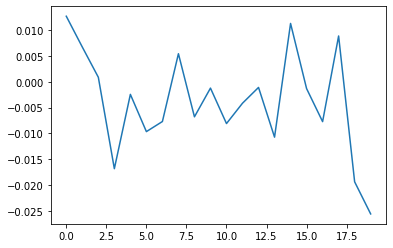

In [66]:
plt.plot(irf_results[:, 0, 0, 0])

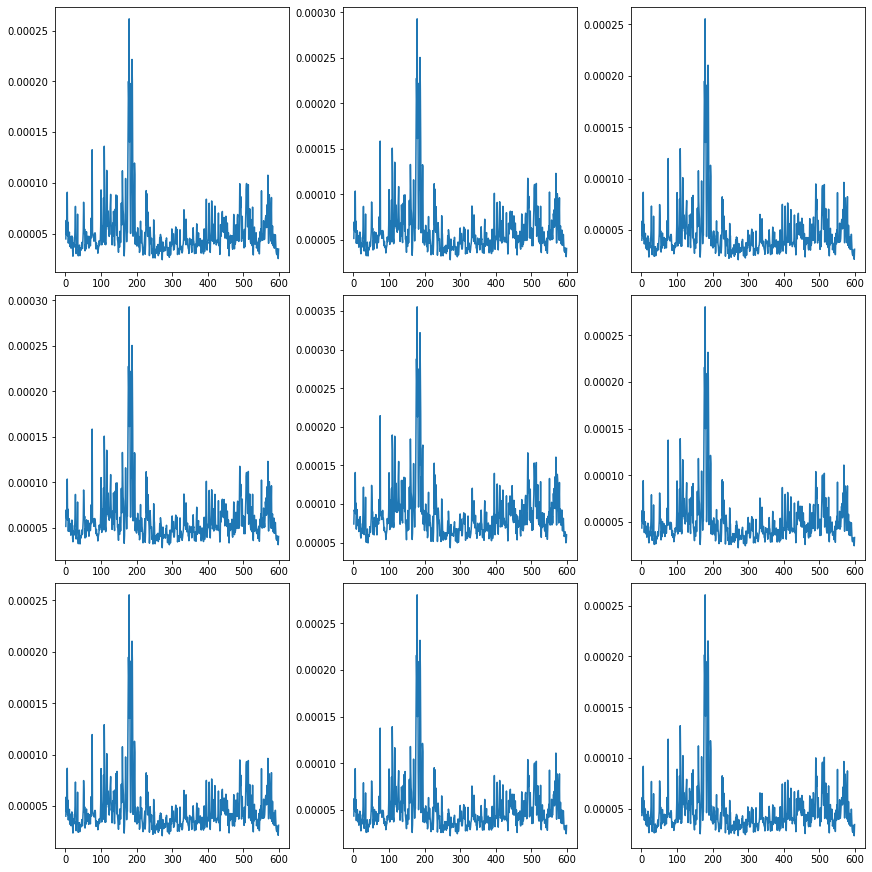

In [76]:
# Plot the covariance matrix
fig, axs = plt.subplots(3, 3, figsize=(3 * 4, 3 * 4), constrained_layout=True)
for row in range(3):
  for col in range(3):
    axs[row, col].plot(irf_cov_mat[:, row, col, 0, 0])

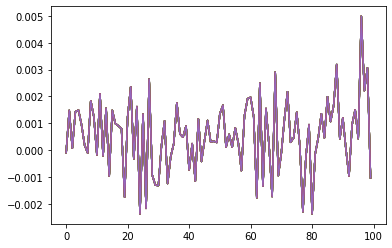

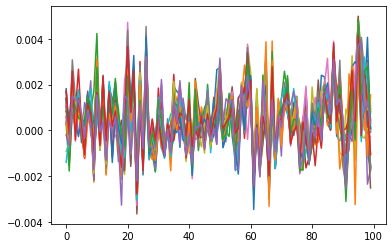

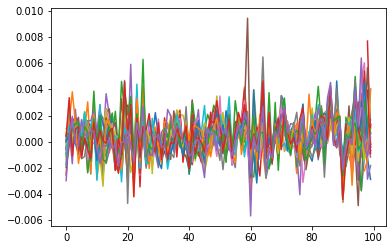

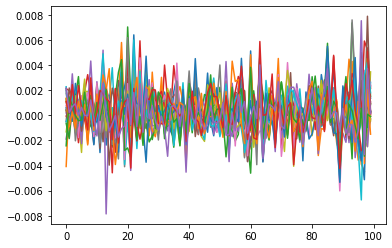

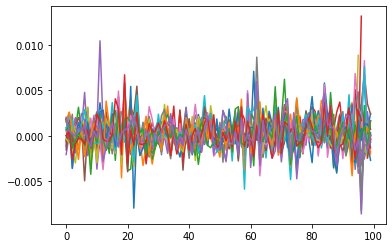

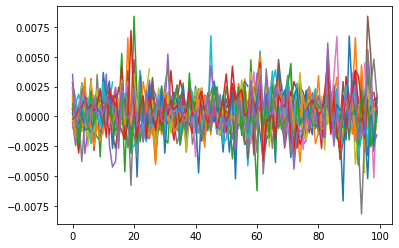

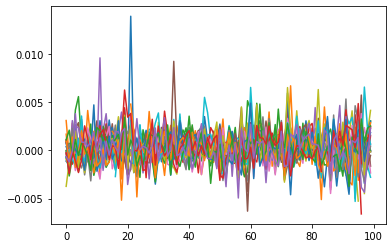

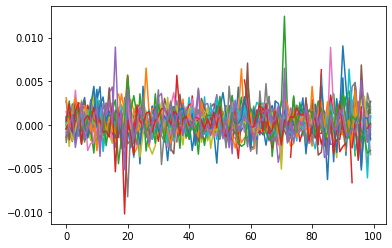

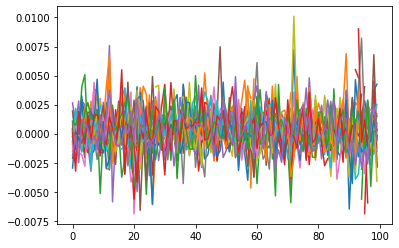

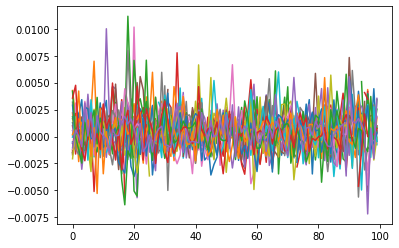

In [55]:
for h in range(1, 11):
  plt.figure()
  fcast_results_h = fcast_results[h, :, :, :, 0]
  fcast_results_h_median = np.nanmedian(fcast_results_h, axis = 1) # n_var x n_obs
  plt.plot(fcast_results_h[0, :, :].T)
  plt.show()

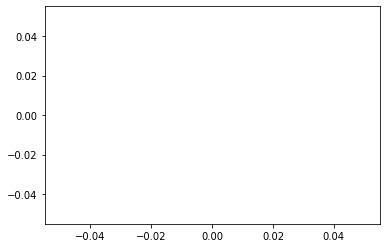

In [61]:


plt.plot(irf_results[:, 0, 0, 1] - irf_results[:, 0, 0, 0])